In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

police = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f", index_col=("INCIDENTNEIGHBORHOOD"))

In [2]:
police.head(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,,
Bloomfield,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",5,804.0,8.0,2.0,-79.949277,40.452551
Outside City,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",OSC,5599.0,NaN,NaN,-80.088018,40.440136
Westwood,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",5,2811.0,9.0,2.0,-79.891803,40.486625
East Allegheny,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",1,2304.0,1.0,1.0,-80.001939,40.454080
Crafton Heights,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",5,2814.0,2.0,5.0,-80.052204,40.445900


In [3]:
neighborhoodarrests = police.groupby(["INCIDENTNEIGHBORHOOD"]).size().reset_index(name="counts")
neighborhoodarrests.head(10)

,INCIDENTNEIGHBORHOOD,counts
0,Allegheny Center,837
1,Allegheny West,87
2,Allentown,663
3,Arlington,200
4,Arlington Heights,109
5,Banksville,186
6,Bedford Dwellings,442
7,Beechview,851
8,Beltzhoover,369
9,Bloomfield,682


In [4]:
minarrests = neighborhoodarrests["counts"].min()
print(minarrests)
neighborhoodarrests.loc[neighborhoodarrests["counts"] == minarrests].iloc[0]

2


INCIDENTNEIGHBORHOOD    Mt. Oliver Neighborhood
counts                                        2
Name: 57, dtype: object

In [6]:
orderedarrests = neighborhoodarrests.sort_values(["counts", "INCIDENTNEIGHBORHOOD"], ascending=True)
orderedarrests.head(20)

,INCIDENTNEIGHBORHOOD,counts
57,Mt. Oliver Neighborhood,2
91,Troy Hill-Herrs Island,6
56,Mt. Oliver Boro,16
72,Regent Square,22
19,Central Northside,23
73,Ridgemont,25
58,New Homestead,26
88,Swisshelm Park,27
21,Chartiers City,28
84,St. Clair,35


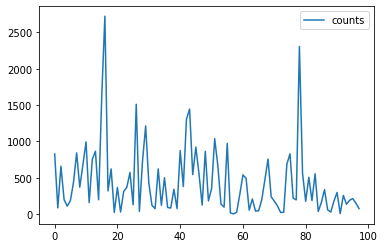

In [28]:
neighborhoodarrests.plot()

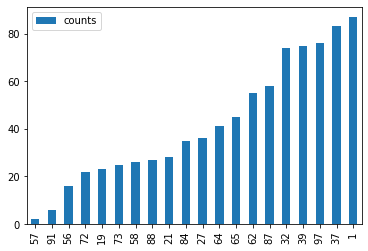

In [7]:
orderedarrests.head(20).plot.bar()

In the end, Mt. Oliver neighborhood was the best neighborhood in Pittsburgh based on the amount of incidents that occurred in the area. In my analysis, I focused on police arrest data. Mt. Oliver was the highest ranked with only 2 arrests. It also ranked well in our other two metrics, 311 calls and fire incidents. It is important to note, I think, that population wasn't taken into consideration because living in a smaller neighborhood may be advantageous and lead to less incidents.